In [138]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color
import skimage.filters
from scipy import signal
import random
import colorsys
from PIL import Image

In [139]:
def load_image_as_np_array(filepath):
    # Open the image file
    img = Image.open(filepath)
    
    # Convert the image to a NumPy array
    img_array = np.array(img)/255.0
    
    return img_array

def display_images(images, titles,max_img_per_row=3,conversion=cv2.COLOR_BGR2RGB):
   
    num_images = len(images)
    max_images_per_row = max_img_per_row
    num_rows = (num_images + max_images_per_row - 1) // max_images_per_row  # Calculate number of rows needed
    
    # Create the subplots
    fig, axs = plt.subplots(num_rows, max_images_per_row, figsize=(15, 5 * num_rows))
    
    # Flatten the axs array in case of multiple rows
    axs = axs.flatten()
    
    for i in range(num_images):
        # disp_image = cv2.cvtColor(images[i].astype(np.uint8),conversion)
        axs[i].imshow(images[i],cmap='grey',vmin=0.0,vmax=1.0)
        axs[i].set_title(titles[i])
        axs[i].axis('off')  # Hide axes
    
    # Turn off remaining subplots if there are any
    for i in range(num_images, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Task 1: Low Pass Filters
You are required to implement three functions corresponding to three types of low pass filters. These are:
<ol>
<li> Ideal low pass filter </li>

<li> Butterworth filter </li>

<li> Gaussian filter </li>
</ol>
For each of these filters, we will be considering a parameter, $D_0$, which denotes the cutoff frequency. And in case of the Butterworth filter, we will consider an additional parameter, $n$, which denotes the order.

Complete the three functions given in the following code cells:

In [140]:
a_image = load_image_as_np_array('a_shape.tif')

In [141]:
def idealLPF(image, D0):
  #implement this function
  filter= np.zeros(image.shape)
  temp= np.zeros(image.shape)


  x_mid , y_mid = (image.shape[0]//2,image.shape[1]//2)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):

      temp[i][j] = ((-1)**(i+j)) * image[i][j]
      if (x_mid-i)**2+(y_mid-j)**2 < D0**2:
        filter[i][j]=1.0

  
  fft2 = (np.fft.fft2(temp))
  blur_image = fft2* filter
  blur_image = np.abs(np.fft.ifft2(blur_image))
  return blur_image

In [142]:
def butterworthLPF(image, D0, n):
  filter= np.zeros(image.shape)
  temp= np.zeros(image.shape)

  x_mid , y_mid = (image.shape[0]//2,image.shape[1]//2)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):

      temp[i][j] = ((-1)**(i+j)) * image[i][j]
      D = (x_mid-i)**2+(y_mid-j)**2

      
      filter[i][j]=(1.0/(1.0+(D/(D0*D0))**n))

  
  fft2 = (np.fft.fft2(temp))
  blur_image = fft2* filter
  blur_image = np.abs(np.fft.ifft2(blur_image))
  return blur_image

In [143]:
def gaussianLPF(image, D0):
  filter= np.zeros(image.shape)
  temp= np.zeros(image.shape)



  x_mid , y_mid = (image.shape[0]//2,image.shape[1]//2)
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):

      temp[i][j] = ((-1)**(i+j)) * image[i][j]
      D = (x_mid-i)**2+(y_mid-j)**2

      
      filter[i][j]=np.exp(-(D/(2*(D0*D0))))

  
  fft2 = (np.fft.fft2(temp))
  blur_image = fft2*filter
  blur_image = np.abs(np.fft.ifft2(blur_image))
  return blur_image

# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 04.zip. Use your previously implemented functions to show the outputs of the three low pass filters on the sample image. Provide your analysis on the following observations:
<ol>
<li> Explain the reasons for the ringing effect in case of ideal low pass filter. </li>

<li> How can the Butterworth filter be made to have similar effect as the Ideal low pass filter? </li>

<li> How can the Butterworth filter be made to have similar effect as the Gaussian filter? </li>
</ol>

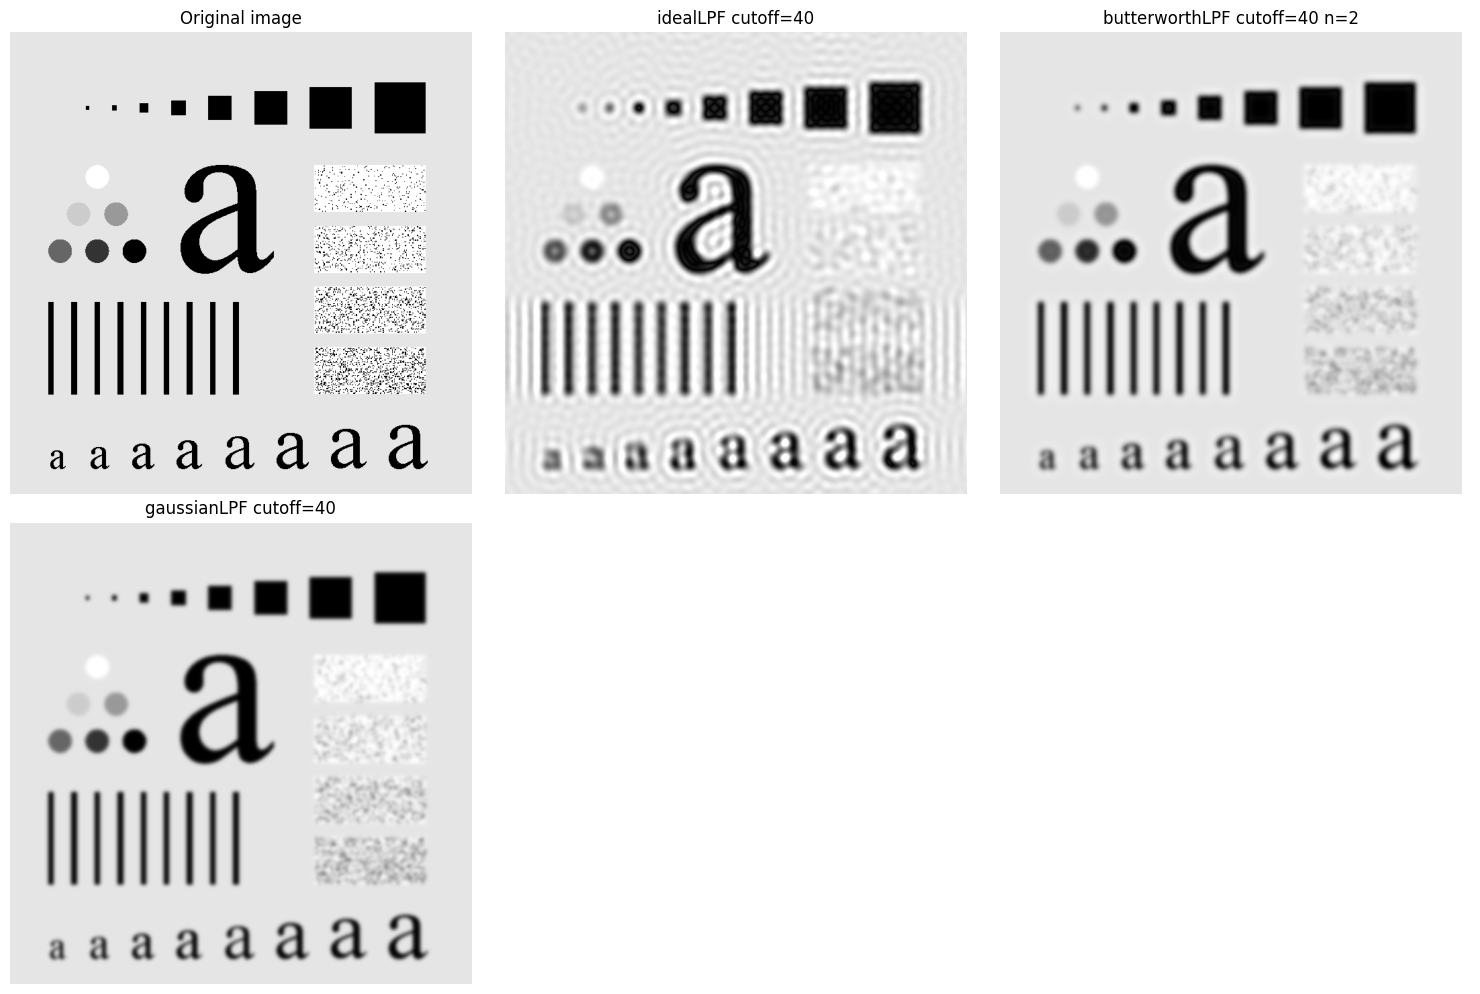

In [144]:
# Generate outputs for Task 1 here
ideal_blur = idealLPF(a_image,40)
butterworth_blur = butterworthLPF(a_image,40,2)
gaus_blur = gaussianLPF(a_image,40)

images=[a_image,ideal_blur,butterworth_blur,gaus_blur]
titles=['Original image','idealLPF cutoff=40','butterworthLPF cutoff=40 n=2','gaussianLPF cutoff=40']

display_images(images=images,titles=titles,max_img_per_row=3)

### Ideal Low pass ringing

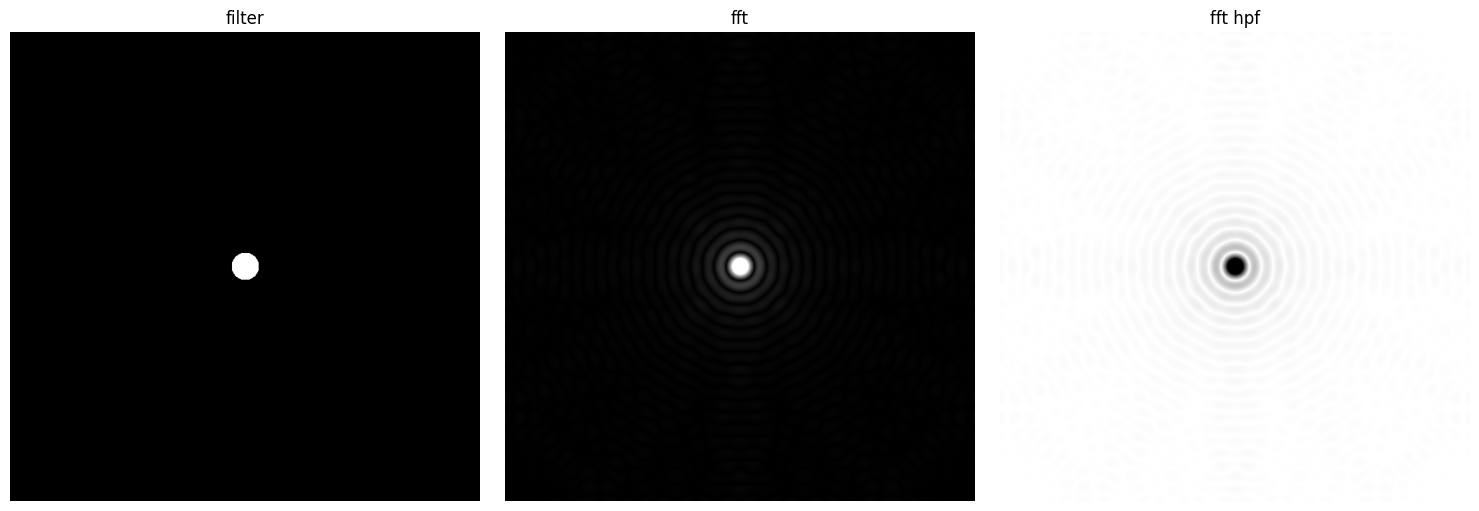

In [153]:
filter= np.zeros(a_image.shape)

D0=20

x_mid , y_mid = (a_image.shape[0]//2,a_image.shape[1]//2)
for i in range(a_image.shape[0]):
    for j in range(a_image.shape[1]):
        if (x_mid-i)**2+(y_mid-j)**2 < D0**2:
            filter[i][j]=1.0

fft = np.fft.fft2(filter,norm='ortho')
fft = np.abs(np.fft.fftshift(fft))



images=[filter,fft,1.0-fft]
titles=['filter','fft','fft hpf']

display_images(images,titles)


### Butterworth for different values of n

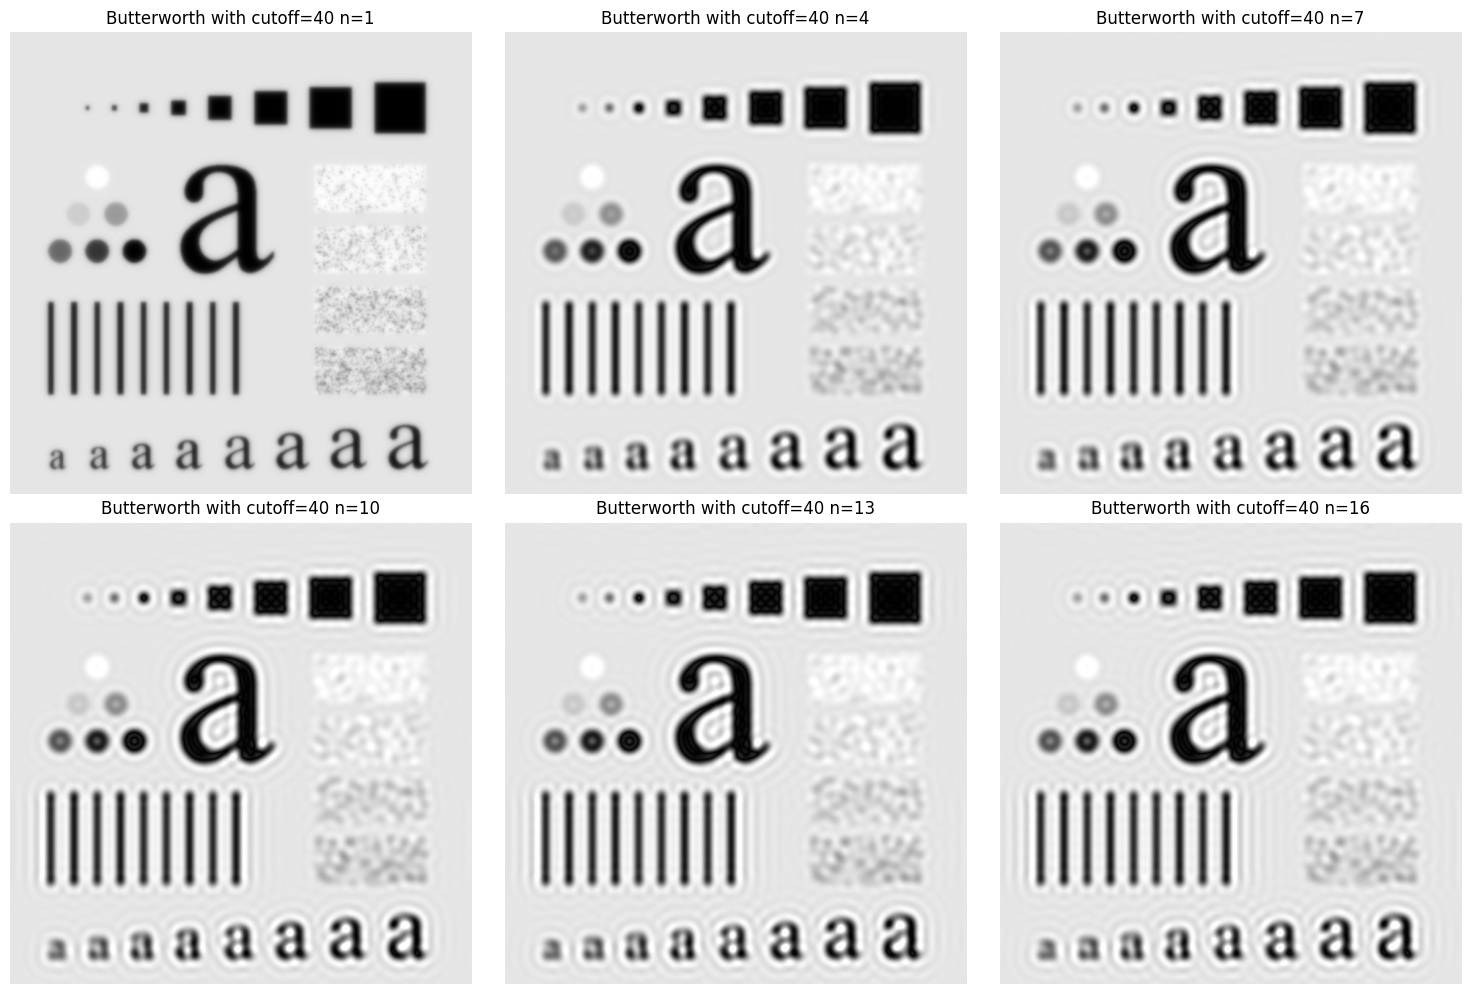

In [146]:
images=[]
titles=[]
for i in range(1,17,3):
    res = butterworthLPF(a_image,40,i)
    title = f'Butterworth with cutoff=40 n={i}'
    images.append(res)
    titles.append(title)

display_images(images,titles)
    

## Analysis:
# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 04.zip. Use your previously implemented functions to show the outputs of the three low pass filters on the sample image. Provide your analysis on the following observations:

* Explain the reasons for the ringing effect in case of ideal low pass filter.    
**Ans:** As shown in the output of the ideal filter , we see that the convolution in the space domain has some rings. Thus if it is convolved in space domain with the image the image also has periodicity.



* How can the Butterworth filter be made to have similar effect as the Ideal low pass filter?    
**Ans:** From the output it is seen that as n increases, the filter becomes sharper , thus resulting in an output similar to the ideal filter with ringing. </li>

* How can the Butterworth filter be made to have similar effect as the Gaussian filter?    
**Ans:** If the order n is lower, the filter acts as a gaussian without sharp transitions in F domain.</li>


# Task 2
For this task, you are required to write three functions  that will each convert the low pass filters implemented in Task 1 into their corresponding high pass versions.

In [147]:
def idealHPF(image, D0):
  #implement this function

  blur_image = image - idealLPF(image,D0)

  return blur_image

In [148]:
def butterworthHPF(image, D0, n):
  #implement this function
  blur_image = image - butterworthLPF(image,D0,n)
  return blur_image

In [149]:
def gaussianHPF(image, D0):
  #implement this function
  blur_image = image - gaussianLPF(image,D0)
  return blur_image

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the three high pass filtering techniques on an appropriate image.

Provide your analysis on the following topic:
<ol>
<li> Do we see the similar effect in ideal HPF as we did in case of ideal LPF? If so, then why? </li>

<li> How does filter cutoff frequency affect the extraction of edges in case of HPF? </li>
</ol>

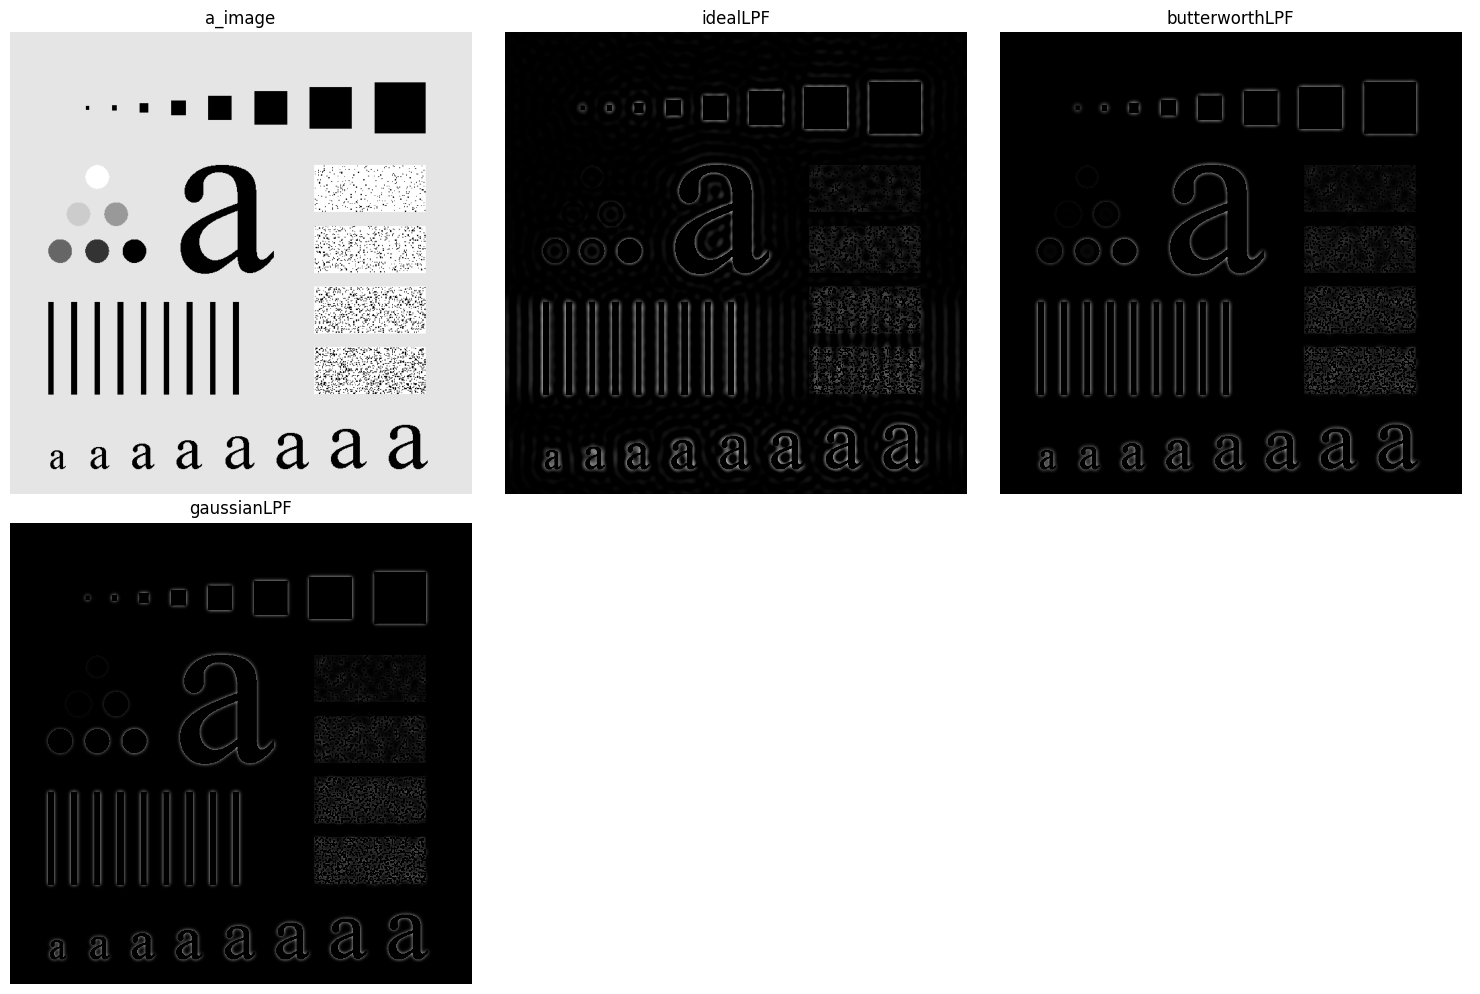

In [150]:
#Generate output for Task 2 here
ideal_blur = idealHPF(a_image,40)
butterworth_blur = butterworthHPF(a_image,40,2)
gaus_blur = gaussianHPF(a_image,40)

images=[a_image,ideal_blur,butterworth_blur,gaus_blur]
titles=['a_image','idealLPF','butterworthLPF','gaussianLPF']

display_images(images=images,titles=titles,max_img_per_row=3)

### Butterworth Ringing for n

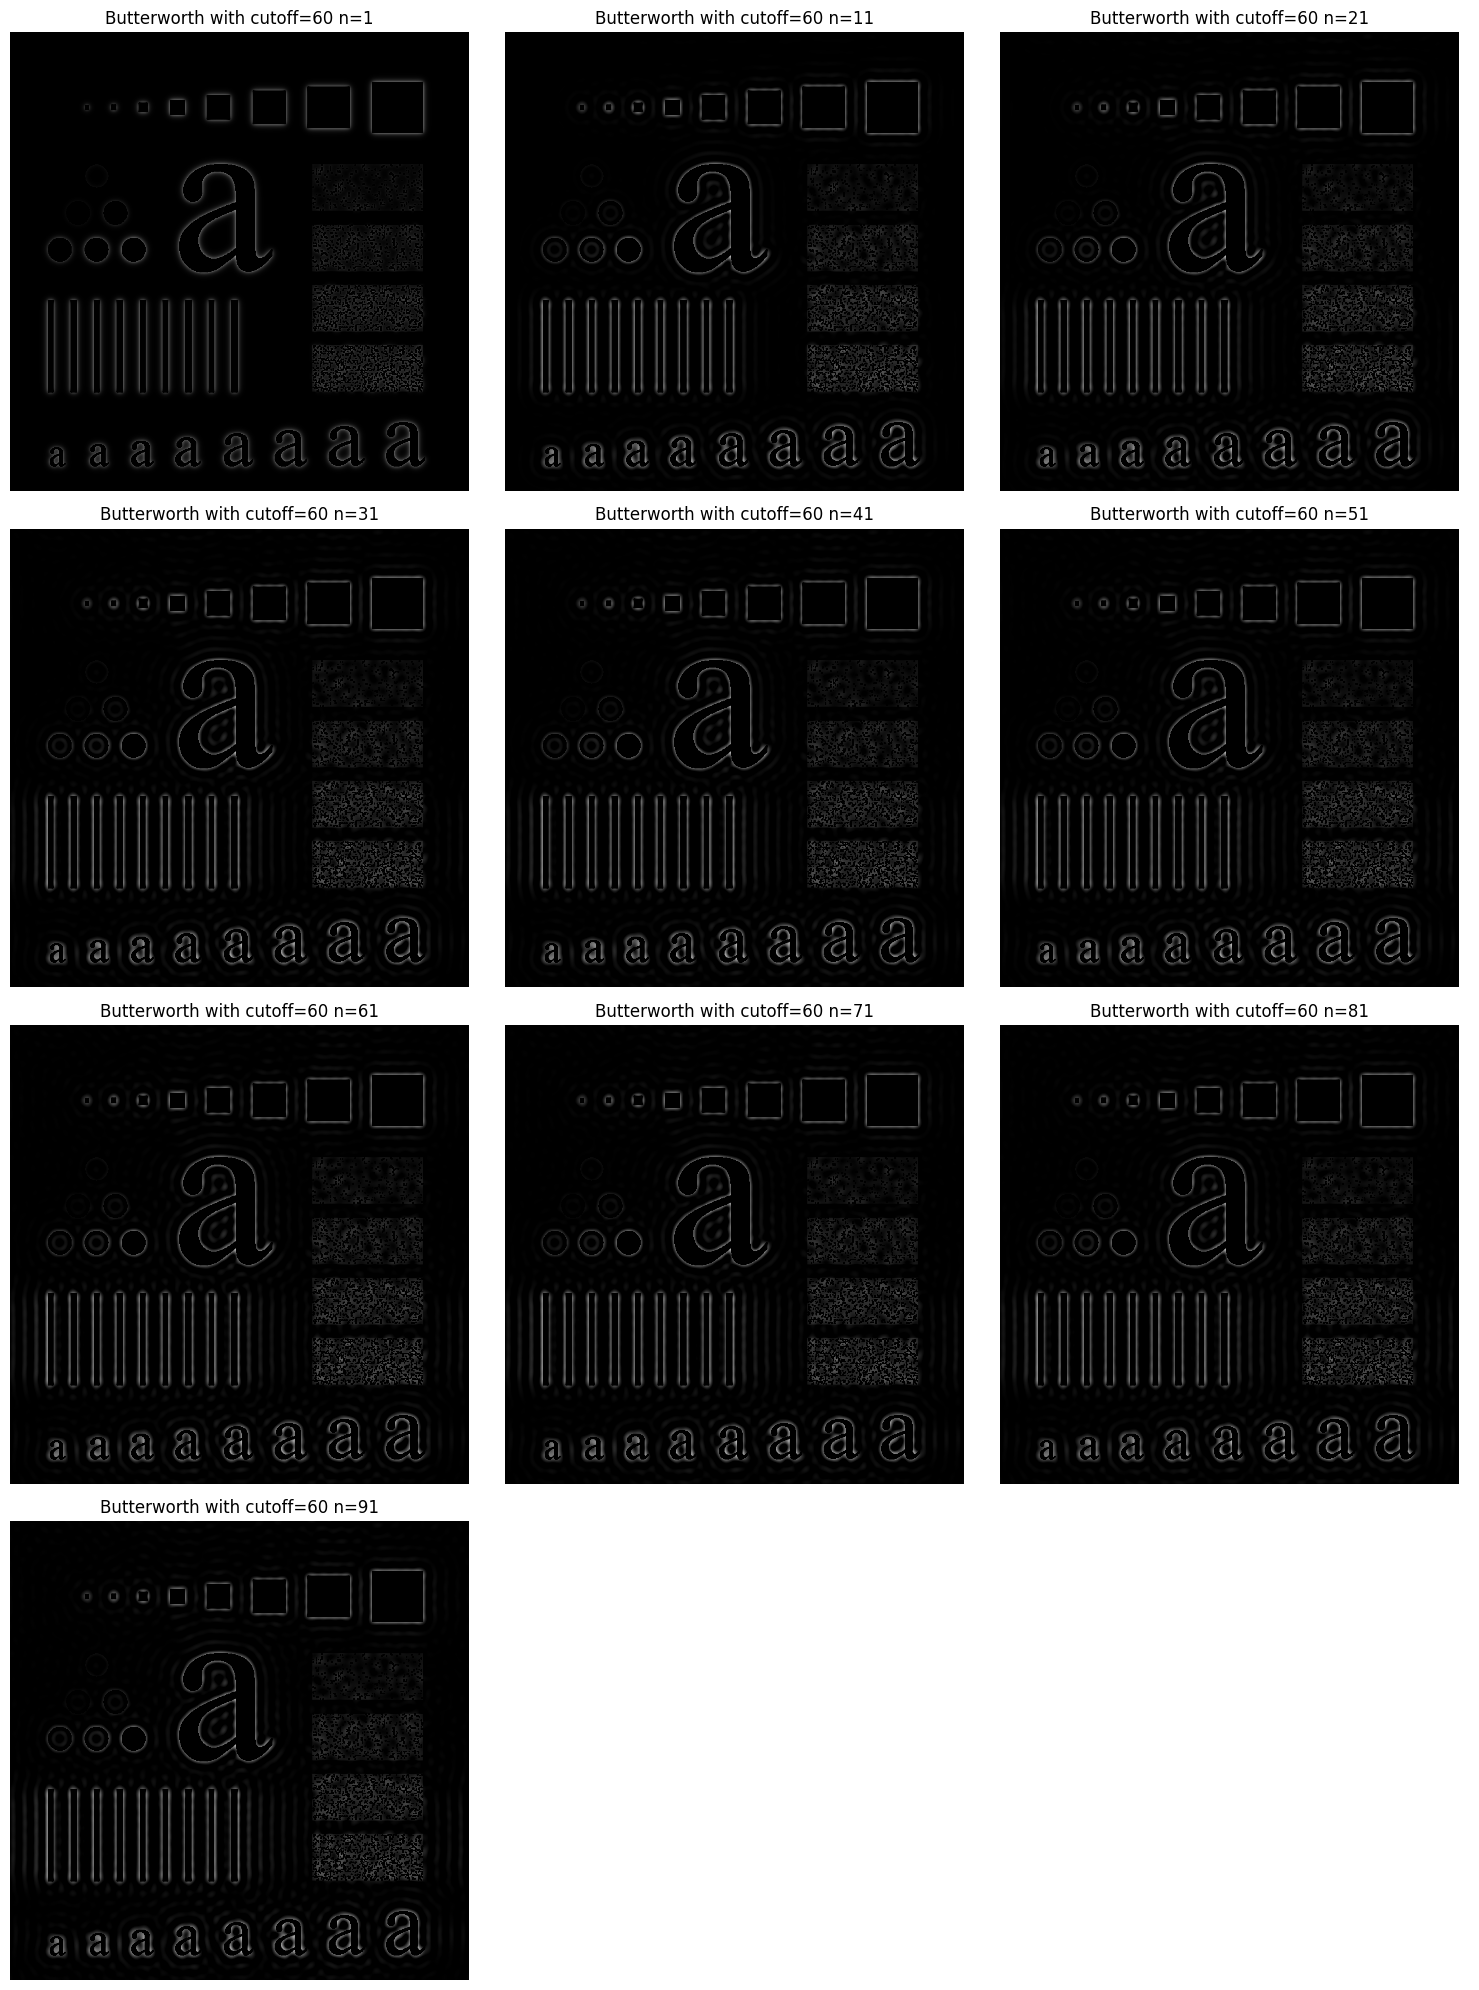

In [151]:
images=[]
titles=[]
for i in range(1,100,10):
    res = butterworthHPF(a_image,40,i)
    title = f'Butterworth with cutoff=60 n={i}'
    images.append(res)
    titles.append(title)

display_images(images,titles)

# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the three high pass filtering techniques on an appropriate image.

Provide your analysis on the following topic:

 * Do we see the similar effect in ideal HPF as we did in case of ideal LPF? If so, then why?   
 **Ans:** Yes, we still see ringing effect here. This is because the ideal HPF is just a complement of the ideal LPF in F domain.Thus the sharp transition is preserved and when the hpf goes through fft in space domain then the ringing is still there as visible from the output. 

* How does filter cutoff frequency affect the extraction of edges in case of HPF?  
**Ans:** If the cutoff freq is higher it means only the higher frequency passes, thus it shows that if frequency is increased, the sharper edges tend to be shown in the figure. If the frequency is lowed then the edge with slower transitions prevail.  
